In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import datetime as dt

In [8]:
df=pd.read_csv('covid_19_india.csv',parse_dates=['Date'],dayfirst=True)

In [9]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [10]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999


In [11]:
# keeping only required columns
df=df[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']]

In [12]:
df.columns=['date','state','cured','deaths','confirmed']

In [14]:
df.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [15]:
df.tail()

,date,state,cured,deaths,confirmed
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999


In [16]:
# current date
today=df[df['date']=='2021-08-11']

In [17]:
today.head()

,date,state,cured,deaths,confirmed
18074,2021-08-11,Andaman and Nicobar Islands,7412,129,7548
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182
18076,2021-08-11,Arunachal Pradesh,47821,248,50605
18077,2021-08-11,Assam,559684,5420,576149
18078,2021-08-11,Bihar,715352,9646,725279


In [18]:
# sorting wrt no of cases confirmed
max_cases_confirmed=today.sort_values(by='confirmed',ascending=False)

In [19]:
top_states_confirmed=max_cases_confirmed[:5]

In [20]:
top_states_confirmed

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182


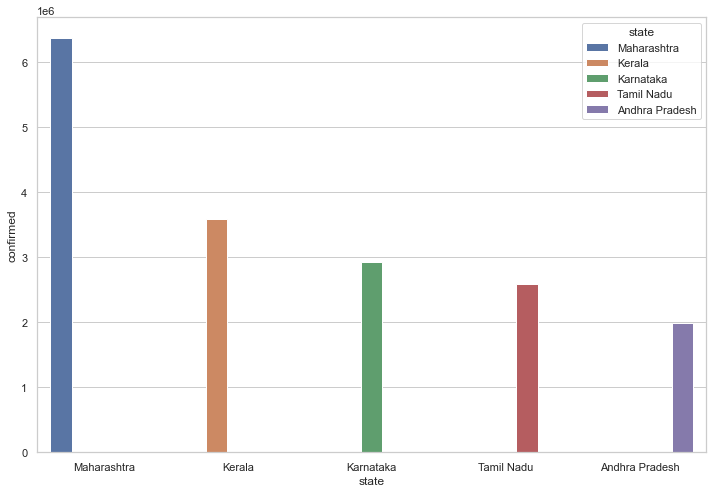

In [29]:
# bar graph for max cases confirmed
sns.set(rc={'figure.figsize':(12,8)},style='whitegrid')
sns.barplot(x='state',y='confirmed',data=top_states_confirmed,hue='state')
plt.show()

In [30]:
# sorting wrt no of deaths on that day
max_deaths_cases=today.sort_values(by='deaths',ascending=False)
top_states_deaths=max_deaths_cases[:5]
top_states_deaths

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18082,2021-08-11,Delhi,1411280,25068,1436852
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812


In [31]:
sns.set(style='whitegrid',rc={'figure.figsize':(12,7)})

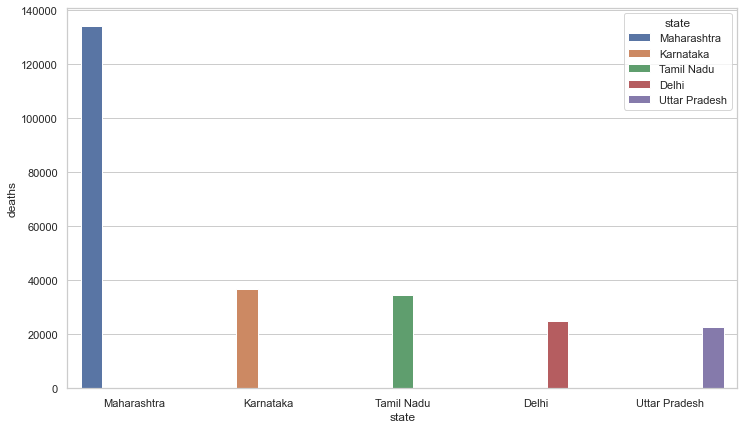

In [36]:
sns.barplot(x='state',y='deaths',data=top_states_deaths,hue='state')
plt.show()

In [37]:
# sorting wrt cured cases
max_cured_cases=today.sort_values(by='cured',ascending=False)

In [38]:
top_states_cured=max_cured_cases[:5]
top_states_cured

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182


In [39]:
sns.set(style='whitegrid',rc={'figure.figsize':(12,7)})

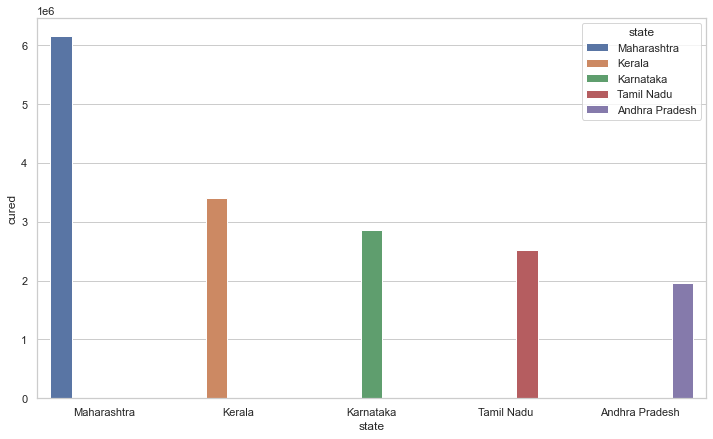

In [42]:
sns.barplot(x='state',y='cured',data=top_states_cured,hue='state')
plt.show()

In [57]:
# Telangana
maha=df[df['state']=='Maharashtra']

In [58]:
maha

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14
...,...,...,...,...,...
17950,2021-08-07,Maharashtra,6130137,133717,6341759
17986,2021-08-08,Maharashtra,6139493,133845,6347820
18022,2021-08-09,Maharashtra,6144388,133996,6353328
18058,2021-08-10,Maharashtra,6151956,134064,6357833


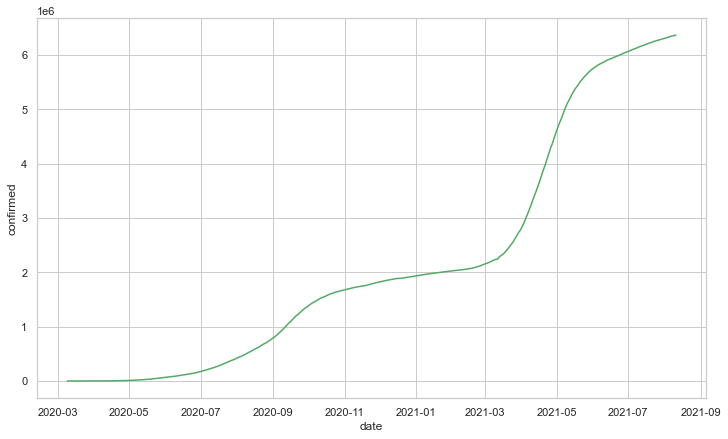

In [60]:
sns.lineplot(x='date',y='confirmed',data=maha,color='g')
plt.show()

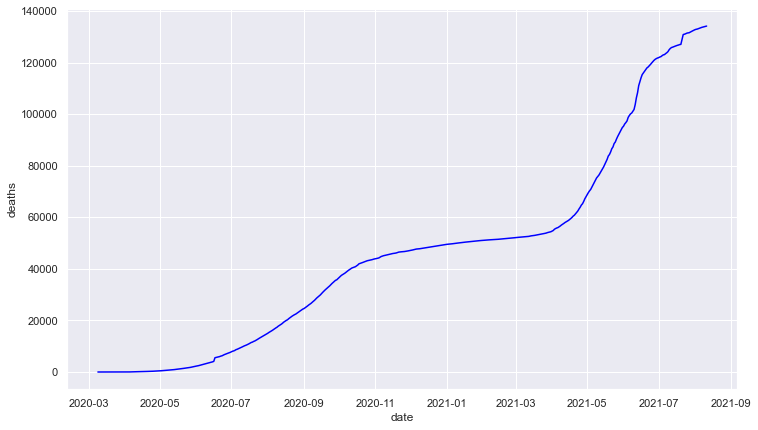

In [62]:
sns.set(rc={'figure.figsize':(12,7)})
sns.lineplot(x='date',y='deaths',data=maha,color='blue')
plt.show()

In [63]:
# kerala
kerala=df[df['state']=='Kerala']

In [64]:
kerala.shape

(560, 5)

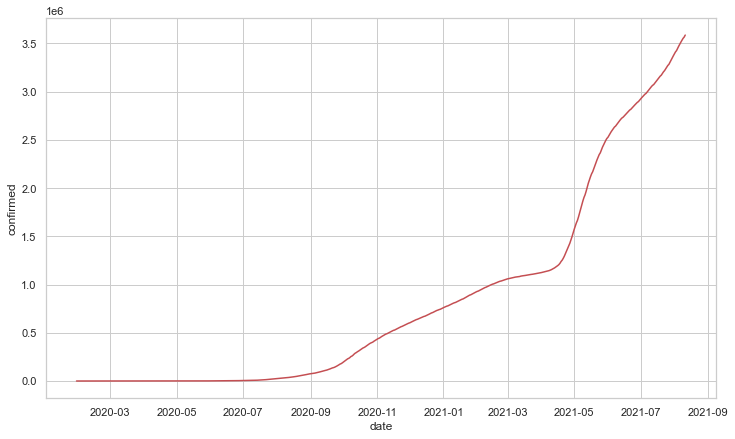

In [65]:
# visualizing confirmed case
sns.set(style='whitegrid',rc={'figure.figsize':(12,7)})
sns.lineplot(x='date',y='confirmed',data=kerala,color='r')
plt.show()

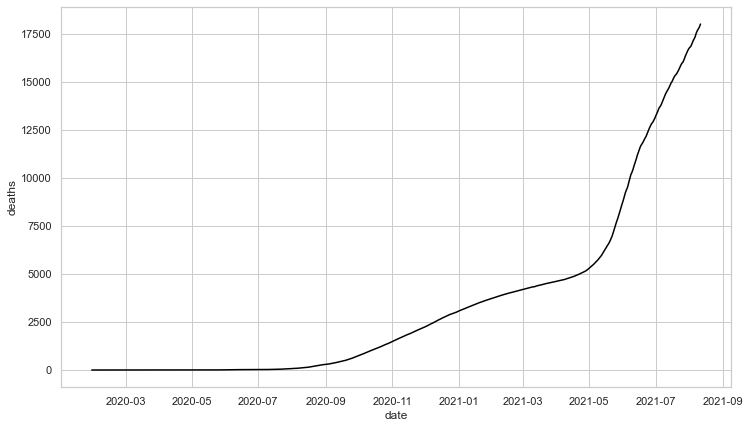

In [66]:
# visualizing deraths 
sns.set(style='whitegrid',rc={'figure.figsize':(12,7)})
sns.lineplot(x='date',y='deaths',data=kerala,color='black')
plt.show()

In [68]:
# Jammu kashmir
jammu=df[df['state']=='Jammu and Kashmir']

In [72]:
jammu

,date,state,cured,deaths,confirmed
81,2020-03-09,Jammu and Kashmir,0,0,1
96,2020-03-10,Jammu and Kashmir,0,0,1
106,2020-03-11,Jammu and Kashmir,0,0,1
117,2020-03-12,Jammu and Kashmir,0,0,1
130,2020-03-13,Jammu and Kashmir,0,0,1
...,...,...,...,...,...
17943,2021-08-07,Jammu and Kashmir,316496,4386,322286
17979,2021-08-08,Jammu and Kashmir,316632,4386,322428
18015,2021-08-09,Jammu and Kashmir,316761,4389,322550
18051,2021-08-10,Jammu and Kashmir,316957,4390,322658


In [69]:
jammu.shape

(521, 5)

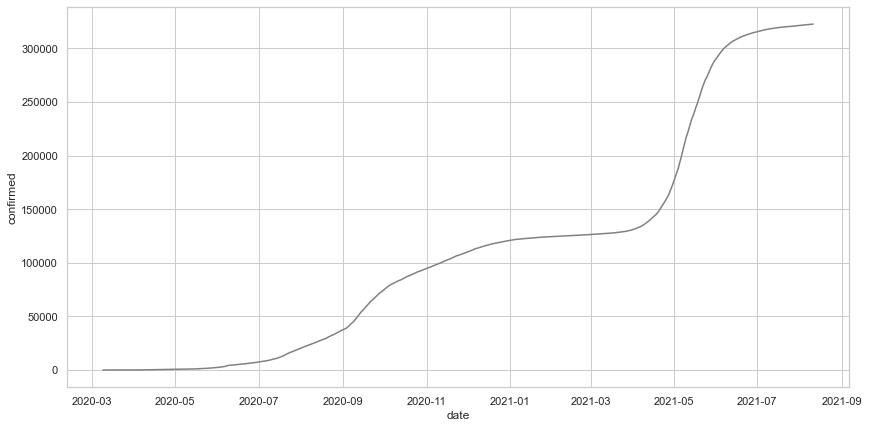

In [71]:
sns.set(rc={'figure.figsize':(14,7)},style='whitegrid')
sns.lineplot(x='date',y='confirmed',data=jammu,color='grey')
plt.show()

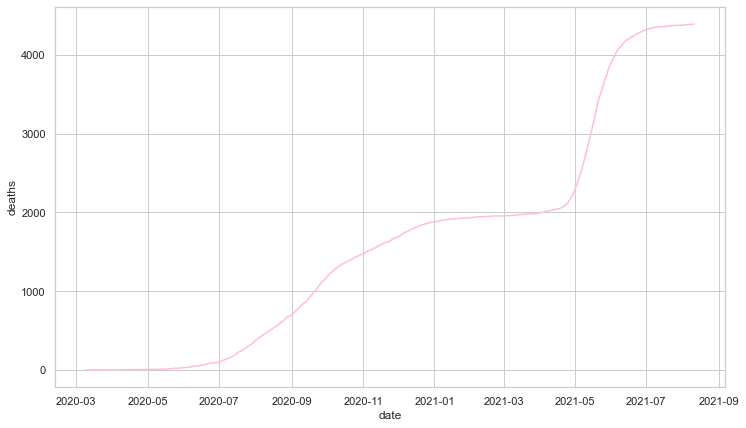

In [73]:
# visualizing confirmed case
sns.set(style='whitegrid',rc={'figure.figsize':(12,7)})
sns.lineplot(x='date',y='deaths',data=jammu,color='pink')
plt.show()

In [74]:
# ################# LINEAR REGRESSION MODEL IMPLEMENTATIOM #########################

In [75]:
x=maha[['date']]

In [84]:
y=maha[['confirmed']]

In [86]:
x=maha['date'].map(dt.datetime.toordinal)

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [98]:
lr=LinearRegression()

In [104]:
lr.fit(np.array(x_train).reshape(-1,1),(y_train))

LinearRegression()

In [105]:
y_pred=lr.predict(np.array(x_test).reshape(-1,1))

In [106]:
mean_squared_error(y_test,y_pred)

571731337793.8007

In [110]:
lr.predict(np.array([[2020-7-19]]))

array([[-9.76229122e+09]])